In [77]:
#name dhdsblend2021_geopandas python=3.7

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
import descartes

In [2]:
from shapely.geometry import Point

In [3]:
barrios = pd.read_csv("clase_07/clase_07/dsad_2021/M1/CLASE_07_GeoPandas/Data/barrios.csv", encoding='latin1')
barrios.head()

,WKT,BARRIO,COMUNA,PERIMETRO,AREA
0,"POLYGON ((-58.4528200492791 -34.5959886570639,...",CHACARITA,15.0,7725.695228,3.118101e+06
1,"POLYGON ((-58.4655768128541 -34.5965577078058,...",PATERNAL,15.0,7087.513295,2.229829e+06
2,"POLYGON ((-58.4237529813037 -34.5978273383243,...",VILLA CRESPO,15.0,8132.699348,3.613584e+06
3,"POLYGON ((-58.4946097568899 -34.6148652395239,...",VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06
4,"POLYGON ((-58.4128700313089 -34.6141162515854,...",ALMAGRO,5.0,8537.901368,4.050752e+06


In [4]:
import shapely.wkt
barrios["WKT"] = barrios["WKT"].apply(shapely.wkt.loads) 
geo_barrios = gpd.GeoDataFrame(barrios, geometry='WKT')

<AxesSubplot:>

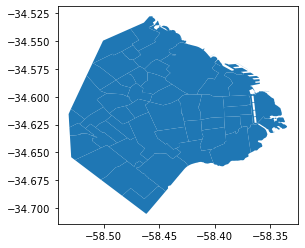

In [5]:
geo_barrios.plot()

In [6]:
data = pd.read_csv("properatti.csv", sep = ",",encoding='latin1')

In [7]:
data_1=data.drop(columns=['image_thumbnail','properati_url','lat-lon','Unnamed: 0'])

In [8]:
data_1=data_1.drop(index=[9761]) #dropeo el index "outlier"

In [9]:
geo_prop=data_1[['lon','lat','geonames_id']].copy()
geo_prop.head()

,lon,lat,geonames_id
0,-58.508839,-34.661824,3430787.0
1,-57.964330,-34.903883,3432039.0
2,-58.522982,-34.652262,3430787.0
3,-58.516424,-34.647797,3431333.0
4,-57.549447,-38.002626,3435548.0


In [10]:
type(geo_prop)

pandas.core.frame.DataFrame

In [11]:
from shapely.geometry import Point


In [12]:
geo_prop = gpd.points_from_xy(data_1.lon, data_1.lat)
dptos = gpd.GeoDataFrame(data_1, geometry=geo_prop)

In [15]:
data_1=data_1.drop(index=[28512])

In [16]:
mask_caba=data_1['state_name']=='Capital Federal'
mask_caba1=data_1[mask_caba]


In [17]:
geo_caba=mask_caba1[['lon','lat','geonames_id','place_name','property_type']].copy()
geo_caba.head()

,lon,lat,geonames_id,place_name,property_type
0,-58.508839,-34.661824,3430787.0,Mataderos,PH
2,-58.522982,-34.652262,3430787.0,Mataderos,apartment
3,-58.516424,-34.647797,3431333.0,Liniers,PH
7,-58.443362,-34.559873,3436077.0,Belgrano,apartment
8,-58.443362,-34.559873,3436077.0,Belgrano,apartment


In [18]:
geodptos = gpd.points_from_xy(mask_caba1.lon, mask_caba1.lat)
dptos_caba = gpd.GeoDataFrame(mask_caba1, geometry=geodptos)

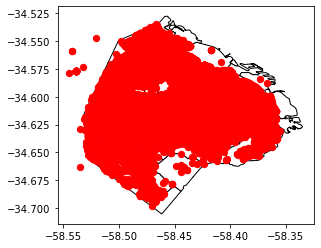

In [19]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
geo_barrios.plot(ax=ax, color='white', edgecolor='black')
dptos_caba.plot(ax=ax, marker='o', color='red', markersize=40)
plt.show();

In [13]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

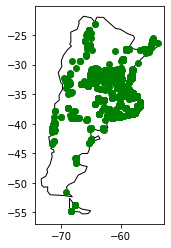

In [14]:
ax = world[world.name == 'Argentina'].plot(color='White', edgecolor='black')
dptos.plot(ax=ax, color='green')
plt.show()

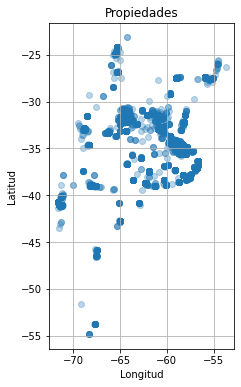

In [20]:
# Muestra los pozos en un gráfico con latitud y longitud
fig, ax = plt.subplots(figsize=(4,6))
ax.set_title('Propiedades')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
plt.grid()

dptos.plot(ax=ax,
               legend = True,
               alpha=0.3)
plt.show()


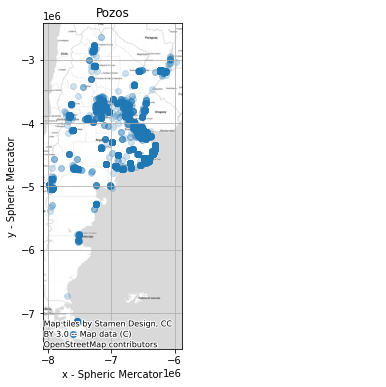

In [36]:
fig, ax = plt.subplots(figsize=(4,6))
ax.set_title('Pozos')
ax.set_xlabel('x - Spheric Mercator')
ax.set_ylabel('y - Spheric Mercator')
plt.grid()

dptos.crs = "EPSG:4326"                        
dptos_3857 = dptos.to_crs(epsg=3857)       
dptos_3857.plot(ax=ax,legend = True,alpha=0.2)

cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite) 